In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
X, y = datasets.make_regression(
                n_samples=500,
                n_features=1,
                noise=15,
                random_state=43)

In [73]:
X.shape, y.shape

((500, 1), (500,))

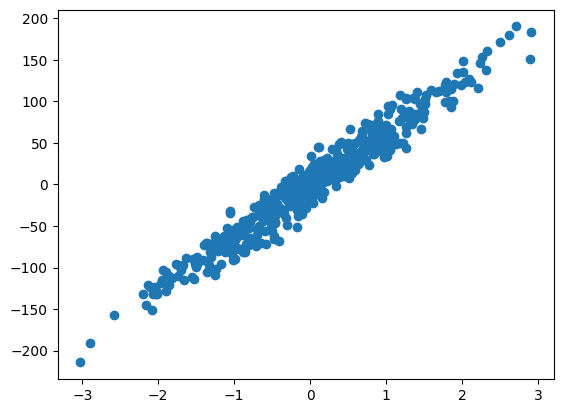

In [74]:
plt.scatter(X,y);
# plt.scatter(X[:, 1],y, color='red');

In [75]:
# The general equation
# y = mx + c (c is bias)

In [76]:
import numpy as np

In [77]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 5000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape # X shape [N,f]
        self.weights = np.random.rand(num_features) # w shape[f,1]
        self.bias = 0
        
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias # Wx + b

            # X.shape [N, f]
            # y_pred.shape [N]
            # dW -> [f]
            # MSE
            dw = (1 / num_samples) * np.dot(X.T ,y_pred - y) 
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
mean_absolute_error(y, lin_reg.predict(X))

11.462619956173487

In [81]:
lin_reg.predict(X)

array([ -56.39236154,    5.4819392 ,   67.49693785,   64.99959038,
        -30.18029773,   77.07676989, -130.32383565,  181.44542233,
        -71.43247718,    6.35831018,   17.44930602,   52.92190034,
        -17.8469566 ,  -83.25395895,   49.47776441,  -67.71146323,
         -4.70979227,  -26.84578465,   46.71618966,   -4.85307566,
         51.12886215,   76.84827999,  -11.85525328,  -47.72240988,
         -0.9187573 ,   23.27042295,    7.85153132,  -63.09284716,
        -10.97018503, -105.47881316,  -86.12975615,   18.74242189,
         -7.05676084,   -6.42727107,   12.93852269,  -41.83024432,
        115.65767088,   -3.42241854,   44.53571126,    2.81462751,
          9.5091717 ,   12.19036122,  -44.63528064,  -32.67248288,
          9.30904551,  -37.32549655,  -66.39960846,   31.70114945,
        -39.43163153, -115.06166533,  -33.27557016,  -66.18099003,
         76.13883237,    5.93379512,  -51.81638019,   65.62701157,
        -10.71736663, -119.46323971,   -4.01794671,  -11.17144

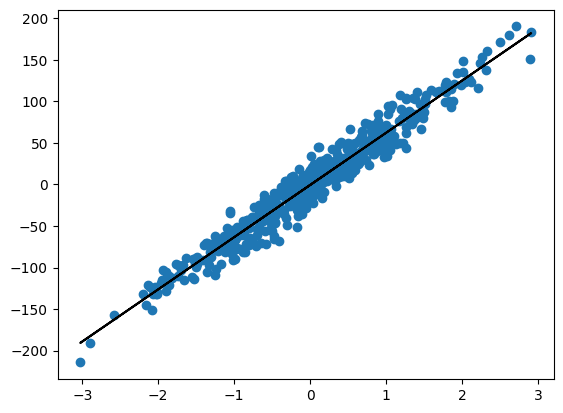

In [82]:
plt.scatter(X,y)
plt.plot(X, lin_reg.predict(X), color='black');

In [83]:
# Looks good!

# Polynomial Regression

In [13]:
import numpy as np
import pandas as pd

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [14]:
X.shape, y.shape

((100, 1), (100, 1))

In [18]:
def poly_features(features, X):
    data = pd.DataFrame(np.zeros((X.shape[0],features)))
    for i in range(1, features+1):
        data.iloc[:,i-1] = (X**i).reshape(-1,1)
    X_poly = np.array(data.values.tolist())
    return X_poly

In [21]:
poly_features(2, X)

array([[-2.12469038e-01,  4.51430919e-02],
       [-1.38078701e+00,  1.90657277e+00],
       [ 3.10884808e-01,  9.66493640e-02],
       [-3.04575163e-01,  9.27660302e-02],
       [-2.03814863e+00,  4.15404983e+00],
       [-2.07743169e+00,  4.31572242e+00],
       [-6.40575942e-01,  4.10337538e-01],
       [ 2.81475873e+00,  7.92286673e+00],
       [ 1.56901487e+00,  2.46180766e+00],
       [ 1.52343027e+00,  2.32083980e+00],
       [ 2.97656344e+00,  8.85992991e+00],
       [ 1.63995923e+00,  2.68946627e+00],
       [-1.09641073e+00,  1.20211648e+00],
       [-1.72811352e+00,  2.98637632e+00],
       [-2.12350311e+00,  4.50926544e+00],
       [-2.98395607e+00,  8.90399383e+00],
       [-2.12405827e+00,  4.51162352e+00],
       [ 2.97809696e+00,  8.86906151e+00],
       [ 2.92849327e+00,  8.57607282e+00],
       [-2.04352233e+00,  4.17598353e+00],
       [ 2.70127025e+00,  7.29686098e+00],
       [ 1.64804385e+00,  2.71604852e+00],
       [ 2.36556966e+00,  5.59591981e+00],
       [ 1.

In [12]:
np.zeros((X.shape[0],features))

NameError: name 'pd' is not defined